In [2]:
import os, sys
import numpy as np
from numba import jit
import librosa
#from scipy import signal
from scipy import ndimage
from matplotlib import pyplot as plt
import IPython.display as ipd
import time
import format
# import libfmp.b
# import libfmp.c2
# import libfmp.c6

In [27]:
def plot_constellation_map(Cmap, Y=None, xlim=None, ylim=None, title='',
                           xlabel='Time (sample)', ylabel='Frequency (bins)',
                           s=5, color='r', marker='o', figsize=(10, 3), dpi=72):
    if Cmap.ndim > 1:
        (K, N) = Cmap.shape
    else:
        K = Cmap.shape[0]
        N = 1
    if Y is None:
        Y = np.zeros((K, N))
    fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=dpi)
    im = ax.imshow(Y, origin='lower', aspect='auto', cmap='gray_r', interpolation='nearest')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    Fs = 1
    if xlim is None:
        xlim = [-0.5/Fs, (N-0.5)/Fs]
    if ylim is None:
        ylim = [-0.5/Fs, (K-0.5)/Fs]
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    n, k = np.argwhere(Cmap == 1).T
    ax.scatter(k, n, color=color, s=s, marker=marker)
    plt.tight_layout()
    return fig, ax, im, k, n
    

In [28]:
def compute_spectrogram(fn_wav, Fs=22050, N=2048, H=1024, bin_max=128, frame_max=None):
    x, Fs = librosa.load(fn_wav, sr=Fs)
    x_duration = len(x) / Fs
    X = librosa.stft(x, n_fft=N, hop_length=H, win_length=N, window='hann')
    if bin_max is None:
        bin_max = X.shape[0]
    if frame_max is None:
        frame_max = X.shape[1]
    Y = np.abs(X[:bin_max, :frame_max])
    return Y


In [29]:
def compute_constellation_map(Y, dist_freq=7, dist_time=7, thresh=0.01):
    result = ndimage.maximum_filter(Y, size=[2*dist_freq+1, 2*dist_time+1], mode='constant')
    Cmap = np.logical_and(Y == result, result > thresh)
    return Cmap

In [44]:
audio_file = 'D:\Khanh Ngoc\Frequency methods\PROJECT_TEST\Xuka BLet.wav'
filename = 'D:\Khanh Ngoc\Frequency methods\PROJECT_TEST\MP3\mexican-audiocoffee.wav'
shortfile = 'D:\Khanh Ngoc\Frequency methods\PROJECT_TEST\clean_signal.wav'

[(1, 3), (63, 3), (88, 3), (175, 3), (212, 3), (237, 3), (324, 3), (858, 3), (38, 4), (523, 5), (548, 5), (586, 5), (598, 5), (635, 5), (797, 5), (846, 5), (871, 5), (896, 5), (946, 5), (1194, 5), (1318, 5), (1728, 5), (13, 6), (25, 6), (50, 6), (75, 6), (100, 6), (112, 6), (125, 6), (137, 6), (150, 6), (162, 6), (187, 6), (199, 6), (249, 6), (274, 6), (299, 6), (311, 6), (336, 6), (361, 6), (411, 6), (423, 6), (448, 6), (473, 6), (485, 6), (498, 6), (510, 6), (535, 6), (560, 6), (610, 6), (622, 6), (647, 6), (672, 6), (684, 6), (709, 6), (721, 6), (734, 6), (771, 6), (808, 6), (821, 6), (833, 6), (883, 6), (920, 6), (957, 6), (970, 6), (982, 6), (1007, 6), (1032, 6), (1044, 6), (1057, 6), (1069, 6), (1081, 6), (1106, 6), (1119, 6), (1131, 6), (1144, 6), (1181, 6), (1206, 6), (1218, 6), (1231, 6), (1243, 6), (1268, 6), (1280, 6), (1293, 6), (1305, 6), (1330, 6), (1342, 6), (1355, 6), (1367, 6), (1380, 6), (1392, 6), (1405, 6), (1417, 6), (1430, 6), (1442, 6), (1467, 6), (1479, 6), (149

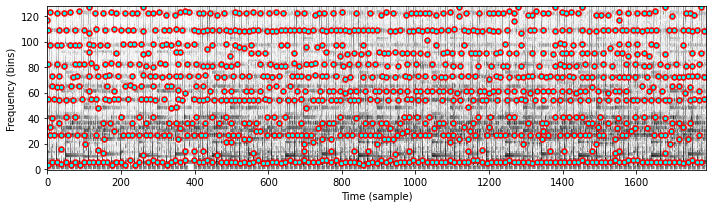

In [43]:
dist_freq = 5  # kappa: neighborhood in frequency direction
dist_time = 10  # tau: neighborhood in time direction
Y = compute_spectrogram(filename)


for i in range(100):
    Cmap = compute_constellation_map(Y, dist_freq, dist_time)

fig, ax, im, k, n = plot_constellation_map(Cmap, np.log(1 + 1 * Y), color='r', s=30)
n, k = np.argwhere(Cmap == 1).T
ax.scatter(k, n, color='cyan', s=5, marker='o')

# Ghép các cặp chỉ số k và n lại thành các tọa độ (k, n)
coordinates = list(zip(k, n))

# In ra các tọa độ đã được ghép
print(coordinates)

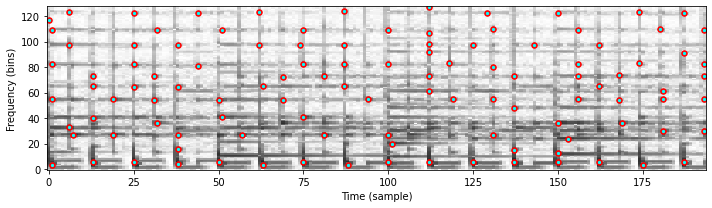

In [45]:
dist_freq = 5  # kappa: neighborhood in frequency direction
dist_time = 10  # tau: neighborhood in time direction
Y2 = compute_spectrogram(shortfile)


for i in range(100):
    Cmap = compute_constellation_map(Y2, dist_freq, dist_time)

fig, ax, im, k, n = plot_constellation_map(Cmap, np.log(1 + 1 * Y), color='r', s=30)
n, k = np.argwhere(Cmap == 1).T
ax.scatter(k, n, color='cyan', s=5, marker='o')

[(1, 3), (63, 3), (88, 3), (175, 3), (38, 4), (13, 6), (25, 6), (50, 6), (75, 6), (100, 6), (112, 6), (125, 6), (137, 6), (150, 6), (162, 6), (187, 6), (150, 13), (137, 15), (38, 16), (101, 20), (153, 24), (7, 27), (19, 27), (38, 27), (57, 27), (81, 27), (100, 27), (131, 27), (181, 30), (193, 30), (6, 33), (32, 36), (150, 36), (169, 36), (13, 40), (51, 41), (75, 41), (137, 48), (31, 54), (50, 54), (69, 54), (168, 54), (1, 55), (19, 55), (94, 55), (119, 55), (131, 55), (156, 55), (181, 55), (193, 55), (112, 61), (181, 61), (25, 64), (38, 64), (13, 65), (63, 65), (87, 65), (162, 65), (69, 72), (13, 73), (31, 73), (81, 73), (112, 73), (137, 73), (156, 73), (193, 73), (168, 74), (131, 80), (44, 81), (1, 82), (25, 82), (75, 82), (87, 82), (100, 82), (156, 82), (193, 82), (118, 83), (174, 83), (187, 91), (112, 92), (6, 97), (25, 97), (38, 97), (62, 97), (74, 97), (87, 97), (125, 97), (143, 97), (162, 97), (112, 98), (112, 107), (1, 109), (32, 109), (51, 109), (75, 109), (100, 109), (156, 109

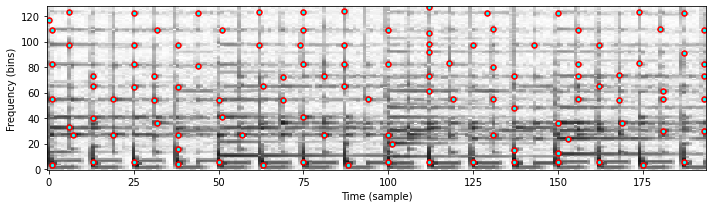

In [39]:
dist_freq = 5  # kappa: neighborhood in frequency direction
dist_time = 10  # tau: neighborhood in time direction
Y1 = compute_spectrogram(audio_file)


for i in range(100):
    Cmap = compute_constellation_map(Y1, dist_freq, dist_time)

fig, ax, im, k1, n1 = plot_constellation_map(Cmap, np.log(1 + 1 * Y), color='r', s=30)
n, k = np.argwhere(Cmap == 1).T
ax.scatter(k, n, color='cyan', s=5, marker='o')

# Ghép các cặp chỉ số k và n lại thành các tọa độ (k, n)
coordinates1 = list(zip(k1, n1))

In [33]:
import uuid 

def hash_point_pair(p1, p2):
    return hash((p1[0], p2[0], p2[1] - p1[1]))

def target_zone(anchor, points, width, height, t):
    x_min = anchor[1] + t   # Thời gian bắt đầu của vùng mục tiêu
    x_max = x_min + width   # Thời gian kết thúc của vùng mục tiêu
    y_min = anchor[0] - (height * 0.5) # Tần số bắt đầu của vùng mục tiêu,
    y_max = y_min + height # Tần số kết thúc của vùng mục tiêu
    
    # print(f"Anchor point: {anchor}")
    # print(f"Target zone x: [{x_min}, {x_max}], y: [{y_min}, {y_max}]")
    
    for point in points:
        if point[0] < y_min or point[0] > y_max:
            continue
        if point[1] < x_min or point[1] > x_max:
            continue
        yield point

"""
hash_point() Tạo ra các băm đại diện cho các điểm đặc trưng trong phổ âm thanh, 
làm cơ sở cho việc xác định bài hát dựa trên các mẫu đặc trưng của nó
"""
def hash_points(points, filename):
    hashes = []
    song_id = uuid.uuid5(uuid.NAMESPACE_OID,filename).int
    print(f"Song ID: {str(song_id)}")


    for anchor in points:
        # Với mỗi điểm cực đại, hàm sẽ xác định vùng mục tiêu xung quanh điểm đó
        for target in target_zone(anchor, points, format.TARGET_W, format.TARGET_H, format.TARGET_START):
            hashes.append((
                # Hash (Tạo ra một băm cho mỗi điểm trong vùng mục tiêu đó)
                hash_point_pair(anchor, target),
                # Time offset
                anchor[1],
                str(song_id),
            ))
    return hashes

# Tính toán spectrogram của tệp âm thanh
Y = compute_spectrogram(filename)

In [41]:
def hash_point_pair(p1, p2):
    return hash((p1[0], p2[0], p2[1] - p1[1]))

def target_zone(anchor, points, width, height, t):
    x_min = anchor[1] + t   # Thời gian bắt đầu của vùng mục tiêu
    x_max = x_min + width   # Thời gian kết thúc của vùng mục tiêu
    y_min = anchor[0] - (height * 0.5) # Tần số bắt đầu của vùng mục tiêu,
    y_max = y_min + height # Tần số kết thúc của vùng mục tiêu
    
    # print(f"Anchor point: {anchor}")
    # print(f"Target zone x: [{x_min}, {x_max}], y: [{y_min}, {y_max}]")
    
    for point in points:
        if point[0] < y_min or point[0] > y_max:
            continue
        if point[1] < x_min or point[1] > x_max:
            continue
        yield point

"""
hash_point() Tạo ra các băm đại diện cho các điểm đặc trưng trong phổ âm thanh, 
làm cơ sở cho việc xác định bài hát dựa trên các mẫu đặc trưng của nó
"""
def hash_points(points, filename):
    hashes = []
    song_id = uuid.uuid5(uuid.NAMESPACE_OID,filename).int
    print(f"Song ID: {str(song_id)}")


    for anchor in points:
        # Với mỗi điểm cực đại, hàm sẽ xác định vùng mục tiêu xung quanh điểm đó
        for target in target_zone(anchor, points, format.TARGET_W, format.TARGET_H, format.TARGET_START):
            hashes.append((
                # Hash (Tạo ra một băm cho mỗi điểm trong vùng mục tiêu đó)
                hash_point_pair(anchor, target),
                # Time offset
                anchor[1],
                str(song_id),
            ))
    return hashes


fingerprint_file = hash_points(coordinates, filename)
fingerprint_audio = hash_points(coordinates, filename)



Song ID: 133901733482141813053267690813951442227
Song ID: 133901733482141813053267690813951442227


MATCH

In [35]:
def match_binary_matrices_tol(C_ref, C_est, tol_freq=0, tol_time=0):
    assert C_ref.shape == C_est.shape, "Dimensions need to agree"
    N = np.sum(C_ref)
    M = np.sum(C_est)
    # Expand C_est with 2D-max-filter using the tolerance parameters
    C_est_max = ndimage.maximum_filter(C_est, size=(2*tol_freq+1, 2*tol_time+1),
                                       mode='constant')
    C_AND = np.logical_and(C_est_max, C_ref)
    TP = np.sum(C_AND)
    FN = N - TP
    FP = M - TP
    return TP, FN, FP, C_AND

In [36]:
def compare_constellation_maps(fn_wav_D, fn_wav_Q, dist_freq=11, dist_time=5, tol_freq=0, tol_time=0):
    Y_D = compute_spectrogram(fn_wav_D)
    Y_Q = compute_spectrogram(fn_wav_Q)

    # Ensure that Y_D and Y_Q have the same shape
    min_frames = min(Y_D.shape[1], Y_Q.shape[1])
    min_bins = min(Y_D.shape[0], Y_Q.shape[0])
    Y_D = Y_D[:min_bins, :min_frames]
    Y_Q = Y_Q[:min_bins, :min_frames]

    Cmap_D = compute_constellation_map(Y_D, dist_freq, dist_time)
    Cmap_Q = compute_constellation_map(Y_Q, dist_freq, dist_time)

    TP, FN, FP, Cmap_AND = match_binary_matrices_tol(Cmap_D, Cmap_Q, tol_freq=tol_freq, tol_time=tol_time)
    title = r'Matching result (tol_freq=%d and tol_time=%d): TP=%d, FN=%d, FP=%d' % (tol_freq, tol_time, TP, FN, FP)
    fig, ax, im, k, n = plot_constellation_map(Cmap_AND, color='green', s=200, marker='+', title=title)
    n, k = np.argwhere(Cmap_D == 1).T
    ax.scatter(k, n, color='r', s=50, marker='o')
    n, k = np.argwhere(Cmap_Q == 1).T
    ax.scatter(k, n, color='cyan', s=20, marker='o')
    plt.legend(['Matches (TP)', 'Reference', 'Estimation'], loc='upper right', framealpha=1)
    plt.tight_layout()
    plt.show()

# Your code for defining filenames and other parameters
# Then call compare_constellation_maps with the filenames and parameters


====== Reference: Original; Estimation: Noise ======


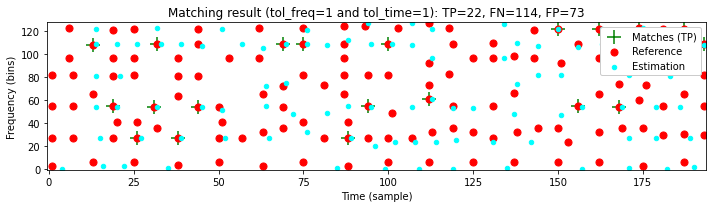

====== Reference: Original; Estimation: Noise ======


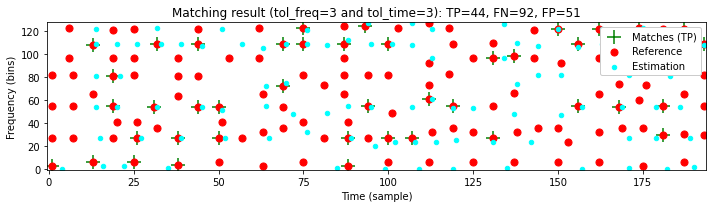

In [38]:
# Define filenames and other parameters
fn_wav_D = 'D:/Khanh Ngoc/Frequency methods/PROJECT_TEST/clean_signal.wav'
fn_wav_Q = 'D:/Khanh Ngoc/Frequency methods/PROJECT_TEST/Record.wav'

# Call compare_constellation_maps with the filenames and parameters
tol_freq = 1
tol_time = 1
print('====== Reference: Original; Estimation: Noise ======')
compare_constellation_maps(fn_wav_D, fn_wav_Q, tol_freq=tol_freq, tol_time=tol_time)

tol_freq = 3
tol_time = 3
print('====== Reference: Original; Estimation: Noise ======')
compare_constellation_maps(fn_wav_D, fn_wav_Q, tol_freq=tol_freq, tol_time=tol_time)
